In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from re import search
import pickle
import ipywidgets as widgets
import logging 
import warnings 
%matplotlib inline

<font size="5">DataSet</font>

In [2]:
# import the dataset into pandas
vehicle_sales = pd.read_csv("car_prices.csv", on_bad_lines= 'skip')

In [3]:
# seeing the raw data of the csv in a pandas dataframe
vehicle_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
# Seeing the info on the dataset
vehicle_sales.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
# Describing the dataset
vehicle_sales.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [6]:
# Checking for any null values
vehicle_sales.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [7]:
# Checking the total count of rows before dropping any null rows
vehicle_sales.count()

year            558811
make            548510
model           548412
trim            548160
body            545616
transmission    493458
vin             558811
state           558811
condition       547017
odometer        558717
color           558062
interior        558062
seller          558811
mmr             558811
sellingprice    558811
saledate        558811
dtype: int64

<font size="5">Descriptive Methods / Data Visualization</font>

<font size = "3">Seeing a distribuiton of sale price vs odometer reading</font>

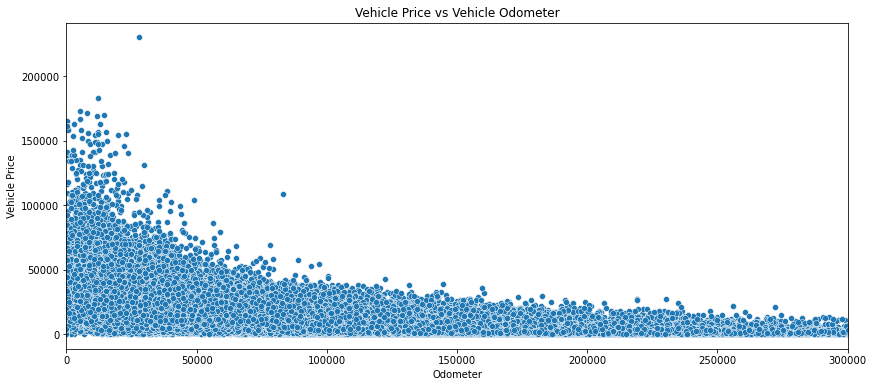

In [8]:
plt.figure(figsize=(14,6))
plt.xlim(0,300000)
ax = sns.scatterplot(x="odometer", y="sellingprice" , data = vehicle_sales)
ax.set(xlabel='Odometer',
       ylabel='Vehicle Price',
       title= 'Vehicle Price vs Vehicle Odometer');

<font size = "3">Distribution of Vehicles Based on Their Condition</font>

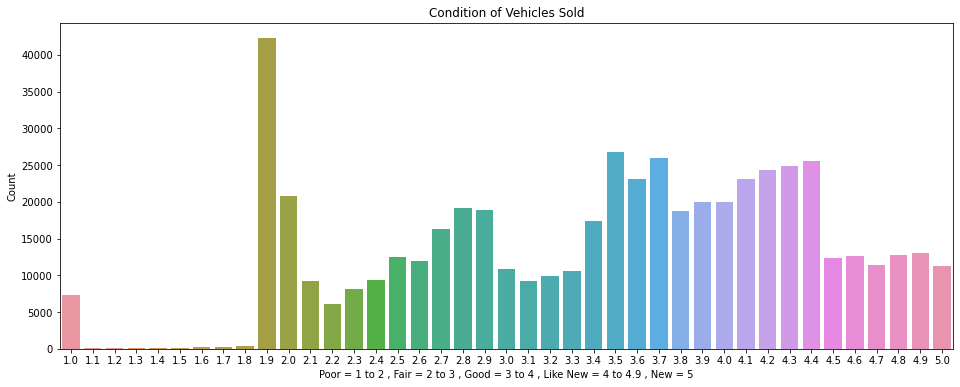

In [9]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='condition', data= vehicle_sales)
ax = ax.set(xlabel="Poor = 1 to 2 , Fair = 2 to 3 , Good = 3 to 4 , Like New = 4 to 4.9 , New = 5", ylabel = "Count", title ="Condition of Vehicles Sold")


<font size = "3">Pairplot Showing Distribution for All Integer Variables</font>

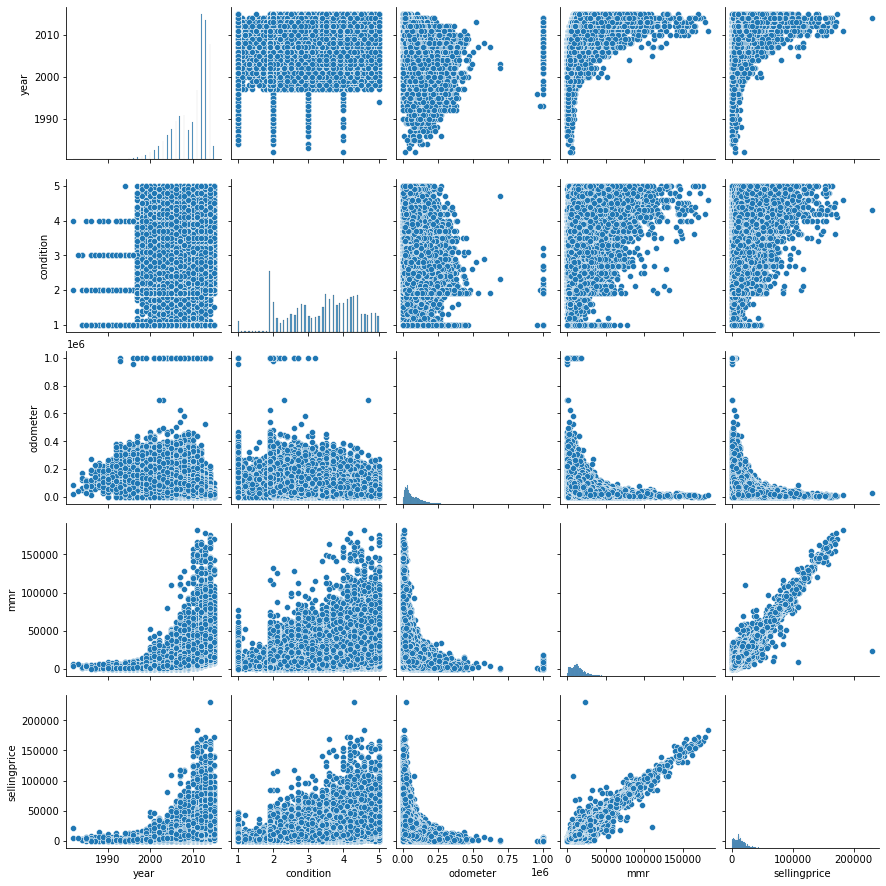

In [10]:
sns.pairplot(vehicle_sales);

<font size="5">Cleaning the Data</font>

In [11]:
# I am dropping columns that will not be relevent to the model. This will require less proccessing time.
vehicle_sales = vehicle_sales.drop(['vin', 'saledate', 'seller', 'trim', 'state',
                           'model', 'transmission', 'interior', 'odometer', 'body'], axis = 1)

In [12]:
# Dropping any null values. With the amount of data in the file this should not affect modeling.
vehicle_sales = vehicle_sales.dropna()

In [13]:
# Re-check the count to ensure all quantities are the same
vehicle_sales.count()

year            536164
make            536164
condition       536164
color           536164
mmr             536164
sellingprice    536164
dtype: int64

In [14]:
# Re-check to ensure there are no null values
vehicle_sales.isna().sum()

year            0
make            0
condition       0
color           0
mmr             0
sellingprice    0
dtype: int64

<font size="5">Non-Descriptive / Analytics</font>

In [15]:
# Need to convert our non number columns into dummy number columns
dummies = pd.get_dummies(vehicle_sales, drop_first = True)
dummies

,year,condition,mmr,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow,color_—
0,2015,5.0,20500,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015,5.0,20800,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014,4.5,31900,30000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,4.1,27500,27750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,4.3,66000,67000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,4.5,35300,33000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
558807,2012,5.0,30200,30800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
558808,2012,4.8,29800,34000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558809,2015,3.8,15100,11100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Set our X for the model
x = dummies.drop("sellingprice", axis = 1)

# Set our Y for the model
y = dummies["sellingprice"]

<font size = "3">Create, Train and Fit Our Model</font>

In [17]:
# Create and open our model
model = RandomForestRegressor()
model = pickle.load(open("rfm.pk1", "rb"))

# Split our data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.80)


# Make  our predictions
y_preds = model.predict(x_test)
y_preds

# Here we will score our model and set to variables
model_score = model.score(x_test, y_test)
mean_abs_err = metrics.mean_absolute_error(y_test, y_preds)

In [18]:
print(model_score)

0.9675278428518319


<font size = "3">Create the Vehicle Price Prediction Function</font>

In [19]:
# Create the function to calculate_vehicle_price
def calculate_vehicle_price(year, quality, make, color):
    
    #  Create columns_x by declaring and initialzing variables by using x from dummies
    columns_x = list(x.columns)
    
    # To calculate vehicle price we will take the mean of the makes
    mean = vehicle_sales.groupby("make").mean()
    mean.mmr[make.value]

    # Set array to our variables from values from the widgets
    arr = [year.value, quality.value, mean.mmr[make.value], make.value, color.value]
    make_index = columns_x.index("make_" + arr[3])
    color_index = columns_x.index("color_" + arr[4])

    # Taking our integer widget values and filling the array
    prediction_array = [0, 0.0, 1111]
    for i in range(111):
        prediction_array.append(0)

    # Get index from widget array and fill the prediction array
    prediction_array[0] = arr[0] # Set year 
    prediction_array[1] = arr[1] # Set condition 
    prediction_array[2] = arr[2] # Set MMR
    prediction_array[make_index] = 1 # Set Make 
    prediction_array[color_index] = 1 # Set color 

    # Creating an array from the pandas dataframe of the x columns
    columns_converted = pd.DataFrame(columns_x)

    # Setting the dataframe to send to the price_prediction
    df = pd.DataFrame(data = [prediction_array], columns = columns_converted)

    # Calculate price_prediction from values
    price_prediction = model.predict(df.values).astype(float)
    
    return price_prediction

<font size = "3">Create Widgets for Real Time-Queries</font>

In [20]:
# Create lists to populate the widget dropdowns from the dummies information
columns = list(dummies.columns)
makes = []
colors = []

# Populate the make and colors lists from the columns list
i = 0
for i in range(len(columns)):
    if search('make', columns[i]):
        makes.append(columns[i][5:])

    elif search('color', columns[i]):
        colors.append(columns[i][6:])

# Create dropdown widgets for make,year,color and quality
make = widgets.Dropdown(options = makes, description = "Vehicle Make")
year = widgets.Dropdown(options = range(1980,2022), description = "Vehicle Year")
color = widgets.Dropdown(options = colors, description = "Vehicle Color")
quality = widgets.Dropdown(options = np.arange(0, 5.5, .5).round(1), description = "Vehicle Quality")

# Create the VBox that holds the dropdowns
widgets_box = widgets.VBox([make, year, color, quality])

# Create the children from the widget box
children = [widgets_box]

# Set tab and Initiliaze
tab = widgets.Tab()
tab.children = children

# Set title of the box
tab.set_title(0, 'Vehicle Price Prediction')
tab


<font size = "3">Run the Predictions and Provide Outcome Accuracy</font>

<font size = "2">The dropdowns are provided with the valid information.</font>
<font size = "2">The user will not be able to enter any information that is not provided.</font>

<font size = "2">The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.</font>
<font size = "2">Using the model_score will give us a feature matrix X_test and the expected target values y_test. Predictions for X_test are compared with y_test and accuracy using R² score.</font>

In [21]:
# Create the calculate button and link to calculate vehicle price function
warnings.filterwarnings("ignore")
def on_button_click(_):
    
    # Link function with values from widget
    price_prediction = calculate_vehicle_price(year, quality, make, color)
    
    # When calculate button is clicked do the following
    with out:
        out.clear_output()
        print("**** Vehicle Price Prediction ****")
        print("The model predicts an estimate of $", f"{price_prediction[0]:.2f}", "dollars for this vehicle.")
        print("** Accuracy and Error Analysis **")
        print('Mean Absolute Error:', mean_abs_err)
        print('Accuracy Score:', f"{model_score * 100:.2f}%" )
    return

# Create the calculate button, send data out
calculate_button = widgets.Button(description='Calculate')
out = widgets.Output()

# Link button and click function
calculate_button.on_click(on_button_click)
# Display button and show the output of the function
widgets.VBox([calculate_button,out])


<font size="5">Product Health Monitoring</font>

In [22]:
# Create a log file to detect any events or when program is run
logger = logging.getLogger()
formatter = logging.Formatter('%(asctime)s - %(name)s - %(lineno)s - %(levelname)s - %(message)s')
logger.setLevel(logging.DEBUG)

fhandler = logging.FileHandler(filename='warning_log.log', mode='w')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logging.info('There was an event or the program was ran on this date/time')